## Schwierigkeiten bei den Fotos

* Sand im Gesicht (z.B. ID_0FEWYAAG)
* Unschärfe
* Gras im Vordergrund
* Unterschiedliche Farben der dunklen Bereiche (orange bis schwarz)
* Belichtungen (besonders Überbelichtung und starke Unterbelichtung)
* Verwackelte Schildkröten
* Helle Fäden
* Abbröckelnde Haut
* Bein mit Maserung im Hintergrund
* Datum im Bild
* Schwach ausgebildetes Muster
* Ganze Schildkröte im Bild (ID_0RNNI62X)
* Kopf nimmt nur einen kleinen Teil des Bildes ein (ID_0TN13JTG)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_extra = pd.read_csv('../data/extra_images.csv')

## Head

In [3]:
df_train.head()

,image_id,image_location,turtle_id
0,ID_2RK4WLN8,top,t_id_VP2NW7aV
1,ID_VVW0QXLX,left,t_id_qZ0iZYsC
2,ID_RVATH2HZ,Right,t_id_3b65X5Lw
3,ID_2GB90GPS,left,t_id_YjXYTCGC
4,ID_LM6S0B1M,top,t_id_d6aYXtor


In [4]:
df_test.head()

,image_id,image_location
0,ID_6NEDKOYZ,top
1,ID_57QZ4S9N,left
2,ID_OCGGJS5X,left
3,ID_R2993S3S,top
4,ID_2E011NB0,left


In [5]:
df_extra.head()

,image_id,turtle_id
0,ID_Y0KYE5XD,t_id_he7JTQxO
1,ID_8JTIQ4UI,t_id_he7JTQxO
2,ID_LSXPZYSN,t_id_he7JTQxO
3,ID_SHZ2HDSP,t_id_he7JTQxO
4,ID_6TOFB06E,t_id_xry0Yg2j


## Info

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_id        2145 non-null   object
 1   image_location  2145 non-null   object
 2   turtle_id       2145 non-null   object
dtypes: object(3)
memory usage: 50.4+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_id        490 non-null    object
 1   image_location  490 non-null    object
dtypes: object(2)
memory usage: 7.8+ KB


In [8]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_id   10658 non-null  object
 1   turtle_id  10658 non-null  object
dtypes: object(2)
memory usage: 166.7+ KB


## Image location

In [9]:
# Convert image_location strings to lowercase.
for df in [df_train, df_test]:
  df.image_location = df.image_location.apply(lambda x: x.lower())

In [10]:
df_train['image_location'].value_counts()

right    726
top      717
left     702
Name: image_location, dtype: int64

In [11]:
df_test['image_location'].value_counts()

right    170
top      168
left     152
Name: image_location, dtype: int64

---

Ausrichtung der Bilder im Trainings- und Testset ist relativ ausgeglichen!

---


Number of left, right and top images per turtle ID:

In [37]:
table = pd.pivot_table(df_train, index='turtle_id', columns="image_location",aggfunc='count')
table

image_id          
image_location     left right top
turtle_id                        
t_id_0DPPpRUz         2     5   3
t_id_0g31STvR         2     8   7
t_id_15bo4NKD        10    12   7
t_id_1KIezxkh         4     5   5
t_id_2E8o5Jtl         5     6   6
...                 ...   ...  ..
t_id_uIlC9Gfo         7    10   9
t_id_uJXT7dGu        14    11   8
t_id_uMOOrQu7         3     3   5
t_id_uVgs53Cz         2     6   3
t_id_utw0thCe         8    12   9

[100 rows x 3 columns]

There are no turtles without images of a specific position:

In [41]:
table.isnull().sum()

          image_location
image_id  left              0
          right             0
          top               0
dtype: int64

## Unique turtles

In [42]:
df_train['turtle_id'].nunique()

100

In [43]:
df_extra['turtle_id'].nunique()

2231

In [44]:
df_full = pd.concat([df_train, df_extra], axis=0, ignore_index=True)

In [45]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12803 entries, 0 to 12802
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_id        12803 non-null  object
 1   image_location  2145 non-null   object
 2   turtle_id       12803 non-null  object
dtypes: object(3)
memory usage: 300.2+ KB


In [ ]:
df_full

In [46]:
df_full['turtle_id'].nunique()

2265

In [47]:
more_turtles = df_full['turtle_id'].nunique() - df_train['turtle_id'].nunique()
more_turtles

2165

---

Es gibt 100 Turtles im Trainingsset. Im Extra-Images-Set kommen weitere 2165 Turtles dazu! Insgesamt gibt es 2265 verschiedene Turtles.

---

The number of training images in train- and extra-set per turtle is: 
Mean is 5.65, 
Median is 3.
Maximum is 115.
Minimum is 1.


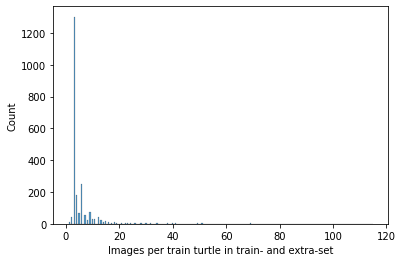

In [48]:
full_images_per_turtle = pd.value_counts(df_full['turtle_id'])
print('The number of training images in train- and extra-set per turtle is: \n'
      f'Mean is {round(np.mean(full_images_per_turtle), 2)}, \n'
      f'Median is {int(np.median(full_images_per_turtle))}.\n'
      f'Maximum is {int(np.max(full_images_per_turtle))}.\n'
      f'Minimum is {int(np.min(full_images_per_turtle))}.')
sns.histplot(full_images_per_turtle)
plt.xlabel('Images per train turtle in train- and extra-set')
plt.show()

The number of training images in train-set per turtle is: 
Mean is 21.45. 
Median is 16.
Maximum is 77.
Minimum is 8.


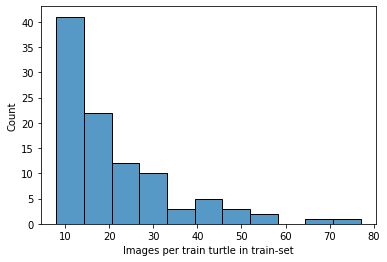

In [49]:
train_images_per_turtle = pd.value_counts(df_train['turtle_id'])
print('The number of training images in train-set per turtle is: \n'
      f'Mean is {round(np.mean(train_images_per_turtle), 2)}. \n'
      f'Median is {int(np.median(train_images_per_turtle))}.\n'
      f'Maximum is {int(np.max(train_images_per_turtle))}.\n'
      f'Minimum is {int(np.min(train_images_per_turtle))}.')
sns.histplot(train_images_per_turtle)
plt.xlabel('Images per train turtle in train-set')
plt.show()

The number of training images in extra-set per turtle is: 
Mean is 4.78. 
Median is 3.
Maximum is 68.
Minimum is 1.


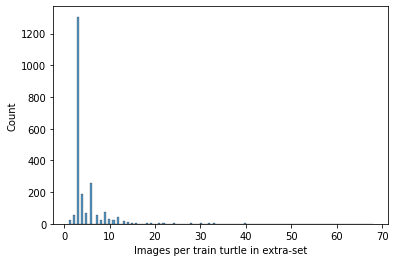

In [50]:
extra_images_per_turtle = pd.value_counts(df_extra['turtle_id'])
print('The number of training images in extra-set per turtle is: \n'
      f'Mean is {round(np.mean(extra_images_per_turtle), 2)}. \n'
      f'Median is {int(np.median(extra_images_per_turtle))}.\n'
      f'Maximum is {int(np.max(extra_images_per_turtle))}.\n'
      f'Minimum is {int(np.min(extra_images_per_turtle))}.')
sns.histplot(extra_images_per_turtle)
plt.xlabel('Images per train turtle in extra-set')
plt.show()